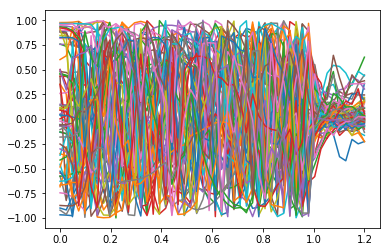

Average is computed over 68 reps.


In [12]:
import numpy as np
from matplotlib import pyplot
from ipywidgets import interact
import sys
from os import path

avg_dir='kw_avg_data/'
out_dir='kw_data_files_vortex/'

Wsc=120
W=Wsc+40
# Lsc_sw=np.arange(10,50,10)
Lsc_sw=np.array([10])

# parameters
vden=0.5
mu=0.6
mu_sc=1.5
phi=0.05
Delta=0.06
t_j=0.6

def wf_avg(SC_width):
    Lsc=SC_width
    L=Lsc+40 # total length of system
    Nrep=400
    N_avg=0
    pyplot.figure()
    for i_r in range(Nrep):
        fname=out_dir+ 'vd_%.2f_phi_%.2f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ws_%d_Ls_%d_r_%d.npz' % (vden,phi,mu,mu_sc,Delta,t_j,W,L,Wsc,Lsc,i_r)
        if path.exists(fname):
            N_avg += 1
            npzfile = np.load(fname)
            if N_avg==1:
                E_list=npzfile['E_list']
                wf_arr=npzfile['wf_arr']
                Pe=npzfile['Pe']
                Ph=npzfile['Ph']
                pyplot.plot(E_list/Delta,npzfile['Pe']-npzfile['Ph'])
            else:
                wf_arr += npzfile['wf_arr']
                Pe += npzfile['Pe']
                Ph += npzfile['Ph']
                pyplot.plot(E_list/Delta,npzfile['Pe']-npzfile['Ph'])

    pyplot.show()
    if N_avg>0:
        wf_arr= wf_arr/N_avg
        Pe= Pe/N_avg
        Ph= Ph/N_avg    
        fname=avg_dir+ 'vd_%.2f_avg_phi_%.2f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ws_%d_Ls_%d.npz' % (vden,phi,mu,mu_sc,Delta,t_j,W,L,Wsc,Lsc)
        np.savez(fname, E_list=E_list, Pe=Pe, Ph=Ph, wf_arr=wf_arr)
        
    return N_avg

for i_L in range(len(Lsc_sw)):
    N_avg= wf_avg(Lsc_sw[i_L])
    print("Average is computed over %d reps." % (N_avg) )

In [13]:
def wf_plot(Energy_index,SC_width):
    Lsc=SC_width
    L=Lsc+40 # total length of system
    fname=avg_dir+ 'vd_%.2f_avg_phi_%.2f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ws_%d_Ls_%d.npz' % (vden,phi,mu,mu_sc,Delta,t_j,W,L,Wsc,Lsc)
    npzfile = np.load(fname)
    E_list=npzfile['E_list']
    wf_arr=npzfile['wf_arr']
    Pe=npzfile['Pe']
    Ph=npzfile['Ph']
    E_list=np.concatenate((-E_list[::-1],E_list))
    wf_arr=np.concatenate((wf_arr[:,:,::-1],wf_arr),axis=2)
    Pe=np.concatenate((Pe[::-1],Pe))
    Ph=np.concatenate((Ph[::-1],Ph))
    

    f_dir='kw_data_files/'
    fname=f_dir+ 'vd_%.2f_phi_%.2f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ws_%d_Ls_%d.npz' % (vden,phi,mu,mu_sc,Delta,t_j,W,L,Wsc,Lsc)
#     fname=avg_dir+ 'avg_phi_%.2f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ws_%d_Ls_%d.npz' % (phi,mu,mu_sc,Delta,t_j,W,L,Wsc,Lsc)
    npzfile = np.load(fname)
#     E_list=npzfile['E_list']
    wf_arr1=npzfile['wf_arr']
    Pe1=npzfile['Pe']
    Ph1=npzfile['Ph']


    i_e=Energy_index
    if not sys.warnoptions:
        import warnings
        warnings.simplefilter("ignore")
    ind=0
    fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(12, 3))
    pyplot.subplot(1,2,1)
#     pyplot.figure()
    Zmat=abs(wf_arr[ind,::2,i_e])**2-abs(wf_arr[ind,1::2,i_e])**2
    Zmat_plot=np.fliplr(np.reshape(Zmat,[L,W])).T
    pos=pyplot.imshow(Zmat_plot, cmap='RdBu_r')#, aspect="auto",
#                                 interpolation='none')
    pyplot.clim(-0.3,0.3)
    pyplot.xlabel("x")
    pyplot.ylabel("y")
    pyplot.title(r"$E/\Delta=%.2f$" % (E_list[i_e]/Delta))
    fig.colorbar(pos)
    pyplot.subplot(1,2,2)
#     pyplot.figure()
    pyplot.plot(E_list/Delta, Pe-Ph);
    pyplot.plot(E_list/Delta, Pe1-Ph1);
    pyplot.plot(E_list[i_e]/Delta, Pe[i_e]-Ph[i_e],'o');
    pyplot.xlabel("energy [Delta]")
    pyplot.ylabel(r"$P_e - P_h$")
    pyplot.show()

NE=100
interact(wf_plot, Energy_index=(0,NE-1,1), SC_width=np.array([10]));

interactive(children=(IntSlider(value=49, description='Energy_index', max=99), Dropdown(description='SC_width'…

In [10]:
# import time

# a=int(time.time())
# print(a)
a=np.random.rand(4)
print(a)
print(a[::-1])

[0.27338381 0.59042786 0.39517732 0.05244464]
[0.05244464 0.39517732 0.59042786 0.27338381]
